In [1]:
from google.colab import drive
drive.mount('/content/drive') # 코랩에 구글드라이브 연동해서 안에 파일들을 사용할 수 있게끔 해준다

Mounted at /content/drive


In [1]:
import os

os.chdir('drive/MyDrive/Multimodal_Fusion_Ratings')
print(os.listdir())

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Multimodal_Fusion_Ratings'

In [ ]:
# !pip install openpyxl

In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fc/a5/4d82be566f069d7a9a702dcdf6f9106df0e0b042e738043c0cc7ddd7e3f6/pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 87.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 121.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python3

In [3]:
!python3 -m pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/e7/54/0c1c068542cee73d8863336e974fc881e608d0170f3af15d0c0f28644531/pip-24.1.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [4]:
# 수집한 데이터 load

import pandas as pd
data_main=pd.read_csv("data.csv")
data_main.head()

,ratings,transcript,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,...,de_ratio,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual
0,BBB,"On the earnings call for AIR on 2017-05-31, th...",36.554125,0.773976,12.839974,26.074627,26.469697,25.318841,25.503650,0.745404,...,0.682116,1.098638,6.298297,7.836994,1.575769,1.848036,0.0,0.000000,0.000000,0.008605
1,BBB,"AIR reported strong quarterly earnings, exceed...",29.819586,0.702109,11.728077,12.382716,12.589958,13.995349,-273.545455,0.537637,...,0.679062,1.263504,7.719933,8.508922,1.751227,2.121500,0.0,0.000000,0.000000,0.012750
2,CCC,"During the earnings call on 2021-05-31, AIR re...",27.840428,0.663635,13.604304,61.397059,62.313433,90.760870,298.214286,0.899017,...,0.959270,0.923419,7.189918,6.856839,1.268180,1.809227,0.0,0.000000,0.000000,-0.021715
3,BBB,AIR reported strong Q1 earnings with revenue u...,27.336809,0.573127,11.099339,18.090253,18.355311,19.806324,19.728346,0.909511,...,0.555582,1.178007,6.189351,9.404594,1.534240,1.832487,0.0,0.000000,0.000000,0.044935
4,A+,"During the earnings call, AAL reported strong ...",13.187465,0.164853,5.946422,9.151229,9.185958,11.232019,11.232019,0.587852,...,11.923173,0.787441,25.808812,15.082781,1.561108,10.176231,0.0,0.002887,0.304206,-0.074970


In [ ]:
# !pip install tensorflow

In [5]:

# import pandas as pd
# data_main=pd.read_csv("data.csv")


import tensorflow as tf


# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

# Set multiple gpus
strategy = tf.distribute.MirroredStrategy()

2024-07-17 05:50:06.844260: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 05:50:06.844329: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 05:50:06.844372: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 05:50:06.854171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


2024-07-17 05:50:08.587297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22455 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6


In [6]:
# !pip install numpy

In [7]:
#change of the rating classes to new classes
import numpy as np

lbl_first = data_main["ratings"].values
lbl_final = lbl_first.copy()

In [8]:
unique_values, counts = np.unique(lbl_final, return_counts=True)

In [9]:
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: A+, Count: 324
Value: A-, Count: 94
Value: AA, Count: 65
Value: AAA, Count: 11
Value: B, Count: 1786
Value: B+, Count: 48
Value: B-, Count: 42
Value: BBB, Count: 6122
Value: BBB+, Count: 1
Value: C, Count: 17
Value: CCC, Count: 2805
Value: D, Count: 30


In [10]:
# 각 class의 비중을 다소 균등하게 조절하기 위해 신규 class로 묶어주기
dict_trans_class={0: ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-'],
                  1: ['BBB+', 'BBB'],
                  2: ['BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'B-'],
                  3: ['CCC', 'CCC-', 'C', 'D']
                  }

# dict_trans_class={1:[1,2,3,4,5],
#                  10:[10,11,12],
#                   13:[13,14,15],
#                   16:[16,17,18,19,20,21,22]
#                   }

In [11]:
# 해당하는 기존 class를 신규 class로 변경
for class_main_idx in dict_trans_class:
    lst_class = dict_trans_class[class_main_idx]
    for item in lst_class:
        lbl_final = np.where(lbl_first == item, class_main_idx, lbl_final)

print(lbl_final)

[1 1 3 ... 2 3 1]


In [12]:
# 신규 class 별 숫자를 확인
lbl_final_rest = lbl_final.copy()
uni_class = np.unique(lbl_final)
print(uni_class)
for idx, item in enumerate(uni_class):
    lbl_final_rest=np.where(lbl_final == item, idx, lbl_final_rest)
print(lbl_final_rest)
unique, counts = np.unique(lbl_final_rest, return_counts=True)
print(np.asarray((unique, counts)).T)

[0 1 2 3]
[1 1 3 ... 2 3 1]
[[0 494]
 [1 6123]
 [2 1876]
 [3 2852]]


In [13]:
# 더 진행하기 전에 기존 데이터 카피를 만들어주고, text를 토큰으로 받기
data_pre = data_main.copy()
data_token = data_pre["transcript"].values # type = np array

In [14]:
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 16.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=8cbad4e7f1f7c413b319a7e6a0aa278915fb138d692de66b9b543209fa9a264e
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.6
    Uninstalling wcwidth-0.2.6:
      Successfully uninstalled wcwidth-0.2.6


In [15]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 37.1 MB/s eta 0:00:00


In [16]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 99.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 102.0 MB/s eta 0:00:0000:0100:01


In [17]:
##########################Preprocessing

# import necessary packages

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

import numpy as np
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from cleantext import clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [18]:
# get lemmatized review
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

# get stemmed review
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [19]:
# remove all stopwords in english review
def remove_stop_words(corpus):
    english_stop_words = stopwords.words('english')
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [20]:
# preprocess review
def preprocess_txt(reviews):
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    NO_SPACE = ""
    SPACE = " "
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, reviews.lower())]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    return reviews

In [21]:
# clean review by cleantext libaray
def clean_text(sent):
    clean_sent=clean(sent,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=False,               # replace all numbers with a special token
        no_digits=True,                # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
        lang="en" )
    return clean_sent

In [22]:
# 위에서 만든 전처리 함수들을 텍스트에 적용
data_pre["transcript"] = data_pre["transcript"].apply(lambda x:clean_text(x))
data_pre["transcript"] = data_pre["transcript"].apply(lambda x:preprocess_txt(x))
data_pre["transcript"] = data_pre["transcript"].apply(lambda x:remove_stop_words(x))
data_pre["transcript"] = data_pre["transcript"].apply(lambda x:get_stemmed_text(x))


In [23]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [24]:
#############################Tokenization -> 정리된 텍스트 데이터를 tokenizer를 이용해 숫자로 변형 후 패딩으로 길이 맞춰주기

import matplotlib.pyplot as plt
text = data_token # data_token 은 string_values 열의 값을 np array로 받은 것
data_token_re = data_token.copy()
from tensorflow.keras.preprocessing.text import Tokenizer
MAX_NB_WORDS=500000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data_token_re)
data_seq = tokenizer.texts_to_sequences(data_token_re)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 5000
data_seq_pad = pad_sequences(data_seq, padding='pre', maxlen=maxlen)

In [25]:
###############################Numeric part
from tensorflow.keras.utils import  to_categorical
lbl_binary = to_categorical(lbl_final_rest).astype(int)

cat = data_main.loc[:, ['ratings']] # categorical 데이터 추출
dum = pd.get_dummies(cat, drop_first=True) # dummy 생성
dum = dum.astype(int)
# 4:101:market, 102:110:bond info, 111:157:finRatio
# num = data_main[list(data_main.iloc[:,2:47])] # numerical 데이터 추출
num = data_main.iloc[:,2:47] # numerical 데이터 추출

# data_meta=num.drop('dater',axis=1)
data_meta = num.copy()

from sklearn.preprocessing import MinMaxScaler
data_meta_normal=data_meta.copy()
sce=MinMaxScaler()
for item_col in data_meta_normal.columns: # minmaxscaler 를 통해 numerical 컬럼들을 normailize
    data_meta_normal[item_col]=sce.fit_transform(data_meta[item_col].values.reshape(-1,1))


data_meta_normal=pd.concat([dum,data_meta_normal],axis=1) # categorical(더미) 와 numerical 컬럼들을 합친다

data_meta_normal["lbl"]=lbl_final_rest # lbl 컬럼 추가 (전에 만들었던 lbl_final_rest 사용)


meta_normal=data_meta_normal.values[:,:-1] # meta_normal을 np.array로 받기
meta_normal.shape

(11345, 56)

In [26]:
from tensorflow.keras.utils import  to_categorical
lbl_binary=to_categorical(lbl_final_rest).astype(int)



from sklearn.model_selection import train_test_split
# train split mode
trian_Percentage=0.80;

# padding 진행한 data_seq (string data) 를 train/test split
x_train, x_test, lbl_train, lbl_test=train_test_split(data_seq_pad,
                                                      lbl_binary,
                                                      test_size=1-trian_Percentage,random_state=0)
# tokenized 데이터를 train/test split
x_train_txt, x_test_txt, lbl_train, lbl_test=train_test_split(data_token,
                                                      lbl_binary,
                                                      test_size=1-trian_Percentage,random_state=0)
# 병합한 meta data를 train/test split
x_train_meta, x_test_meta, lbl_train, lbl_test=train_test_split(meta_normal,
                                                      lbl_binary,
                                                      test_size=1-trian_Percentage,random_state=0)

# CNN layer 에 넣기위해 2D -> 3D로 reshape (마지막에 1 추가)
x_train_meta_re=x_train_meta.reshape(x_train_meta.shape[0],
                                  x_train_meta.shape[1],1)
x_test_meta_re=x_test_meta.reshape(x_test_meta.shape[0],
                                x_test_meta.shape[1],1)

print("-"*50)
print("train shape: {0}".format(x_train.shape))
print("test shape: {0}".format(x_test.shape))
print("x_train_txt shape: {0}".format(x_train_txt.shape))
print("x_train_meta shape: {0}".format(x_train_meta_re.shape))
print("-"*50)


--------------------------------------------------
train shape: (9076, 5000)
test shape: (2269, 5000)
x_train_txt shape: (9076,)
x_train_meta shape: (9076, 56, 1)
--------------------------------------------------


In [27]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train_meta = x_train_meta.astype(np.float32)
x_test_meta = x_test_meta.astype(np.float32)

In [28]:
lbl_binary.shape

(11345, 4)

In [29]:
embedding_dim=500
n_class=lbl_binary.shape[1]


from sklearn.utils import class_weight
class_weights_val = class_weight.compute_class_weight(class_weight='balanced',    # 데이터가 balanced 되지 않아서, 더 잘 훈련하기 위한 가중치 생성
                                                 classes=np.unique(np.argmax(lbl_test,axis=1)),
                                                 y=np.argmax(lbl_test,axis=1))

class_weight=dict()
for idx,val in enumerate(class_weights_val):
    class_weight[idx]=val

class_weight

{0: 6.233516483516484,
 1: 0.468801652892562,
 2: 1.492763157894737,
 3: 0.9647108843537415}

In [30]:
from tensorflow import keras

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve

]

In [31]:
######################Model lstm
from tensorflow.keras.models import Model

def Create_LSTM(data,nb_words,maxlen,embedding_dim,data_meta):



#meta input
  input_meta = keras.layers.Input(shape=data_meta.shape[1:],dtype='float64',name="input_meta")
  layer_meta = keras.layers.Conv1D(filters=64,
                                kernel_size=2,
                                activation='relu',
                                padding="same",
                                strides=(1),
                              name="cov_meta.1")(input_meta)
  layer_meta = keras.layers.MaxPool1D(pool_size=(2),name="meta_maxpool1")(layer_meta)

  layer_meta = keras.layers.LSTM(32)(layer_meta) # return_sequences=False


  # txt input
  word_input_cnn = keras.layers.Input(shape=(maxlen,),dtype='float64',name="txt_input_cnn")
  em_layer_cnn = keras.layers.Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,input_length=maxlen,
                                  name="Embedd_cnn")(word_input_cnn)
  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(2),
                                name="cov_1")(em_layer_cnn)
  layer_data = keras.layers.MaxPool1D(pool_size=(2),name="maxpool1")(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)
  layer_data = keras.layers.Conv1D(filters=32,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                name="cov_2")(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)

  layer_data = keras.layers.Conv1D(filters=16,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(2),
                                name="cov_3")(layer_data)

  layer_data = keras.layers.MaxPool1D(pool_size=(2),name="maxpool2")(layer_data)
  layer_data = keras.layers.LSTM(32)(layer_data)
  layer_data = keras.layers.Dropout(0.5)(layer_data)


  # hybrid
  layer_last = keras.layers.Concatenate(axis=-1)([layer_meta,layer_data])

  layer_last = keras.layers.Flatten()(layer_last)
  layer_last = keras.layers.Dense(32,activation="relu",name="dens_1")(layer_last)
  layer_last = keras.layers.Dropout(0.5)(layer_last)
  output = keras.layers.Dense(n_class, activation='softmax', name='out')(layer_last)
  model = Model(inputs=[word_input_cnn,input_meta],
                       outputs=output)
  opti=keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(loss='categorical_crossentropy',
                       optimizer=opti,
                       metrics=METRICS)
  return model

In [32]:
# 위에 만든 Create_LSTM 함수를 사용하여 모델 생성 후 컴파일
LSTM_embedding=Create_LSTM(data=data_seq_pad,
                      nb_words=MAX_NB_WORDS,
                      maxlen=maxlen,
                      embedding_dim=embedding_dim,
                      data_meta=x_train_meta_re)

2024-07-16 10:20:42.831396: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [35]:
# model fitting
hist_LSTM_embedding=LSTM_embedding.fit([x_train,x_train_meta],lbl_train,epochs=200,
                               validation_data=([x_test,x_test_meta],lbl_test),
                               class_weight=class_weight,
                               shuffle=True,batch_size=100)

Epoch 1/200
91/91 [==============================] - 4s 46ms/step - loss: 0.8922 - tp: 1433.0000 - fp: 1341.0000 - tn: 25887.0000 - fn: 7643.0000 - accuracy: 0.4950 - precision: 0.5166 - recall: 0.1579 - auc: 0.7836 - prc: 0.4902 - val_loss: 1.2939 - val_tp: 79.0000 - val_fp: 239.0000 - val_tn: 6568.0000 - val_fn: 2190.0000 - val_accuracy: 0.3975 - val_precision: 0.2484 - val_recall: 0.0348 - val_auc: 0.6636 - val_prc: 0.3446
Epoch 2/200
91/91 [==============================] - 4s 43ms/step - loss: 0.8913 - tp: 1511.0000 - fp: 1407.0000 - tn: 25821.0000 - fn: 7565.0000 - accuracy: 0.5004 - precision: 0.5178 - recall: 0.1665 - auc: 0.7836 - prc: 0.4919 - val_loss: 1.3032 - val_tp: 81.0000 - val_fp: 259.0000 - val_tn: 6548.0000 - val_fn: 2188.0000 - val_accuracy: 0.3984 - val_precision: 0.2382 - val_recall: 0.0357 - val_auc: 0.6613 - val_prc: 0.3420
Epoch 3/200
91/91 [==============================] - 4s 44ms/step - loss: 0.8995 - tp: 1495.0000 - fp: 1456.0000 - tn: 25772.0000 - fn: 7581

In [36]:
# Save the model
# LSTM_embedding.save('LSTM_embedding_model.h5') # first 200 epochs
LSTM_embedding.save('LSTM_embedding_model2.h5') # additional 200 epochs (total of 400)

In [ ]:
# Load the model
# from keras.models import load_model
# LSTM_embedding = load_model('LSTM_embedding_model.h5')

In [37]:
pred_test_LSTM=LSTM_embedding.predict([x_test,x_test_meta]) # predict
lbl_pred_LSTM=np.argmax(pred_test_LSTM,axis=1).astype(int) # predicted value as its index
lbl_real_LSTM=np.argmax(lbl_test,axis=1).astype(int) # real value as its index

71/71 [==============================] - 2s 13ms/step


In [57]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 138.1 kB/s eta 0:00:0000:0100:01


In [58]:
# 결과 보고서를 위해 필요한 패키지 import
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [59]:
print(len(lbl_test), lbl_pred_LSTM.shape[0])

NameError: name 'lbl_pred_LSTM' is not defined

In [60]:

# BootstrapR2 함수를 통해 결과보고서 작성

def BootstrapR2(pred_test,lbl_test, numboot=10000):
    # Initial Performance Metrics Calculation
    lbl_pred=np.argmax(pred_test,axis=1).astype(int)
    lbl_real=np.argmax(lbl_test,axis=1).astype(int)
    classfi_report=classification_report(lbl_real, lbl_pred,output_dict=True, zero_division=0)
    accuracy=accuracy_score(lbl_real, lbl_pred)
    precision=classfi_report['macro avg']['precision']
    recall= classfi_report['macro avg']['recall']
    f1_score=classfi_report['macro avg']['f1-score']
    roc = roc_auc_score(lbl_test, pred_test, multi_class='ovr',average='weighted')

    #---------------------------------
    n = len(lbl_test)
    roc1 = np.zeros((numboot, 1))
    f1_score1 = np.zeros((numboot, 1))
    accuracy1 = np.zeros((numboot, 1))
    precision1 = np.zeros((numboot, 1))
    recall1 = np.zeros((numboot, 1))


    # bootstrapping
    for i in range(numboot):
        random_index1 = np.random.randint(0, lbl_pred.shape[0],size=len(lbl_test))
        lbl_test1=lbl_test[random_index1]
        pred_test1=pred_test[random_index1]

        lbl_pred1=np.argmax(pred_test1,axis=1).astype(int)
        lbl_real1=np.argmax(lbl_test1,axis=1).astype(int)

        classfi_report=classification_report(lbl_real1, lbl_pred1,output_dict=True, zero_division=0)

        accuracy1[i]=accuracy_score(lbl_real1, lbl_pred1)
        precision1[i]=classfi_report['macro avg']['precision']
        recall1[i]= classfi_report['macro avg']['recall']
        f1_score1[i]=classfi_report['macro avg']['f1-score']
        # print(f1_score1[i])
        # print(lbl_test1.shape)
        # print(pred_test1.shape)
        # print(np.min(pred_test1), np.max(pred_test1))
        # print(np.sum(pred_test1, axis=1))
        # print(np.isnan(pred_test1).any())
        # print(np.isinf(pred_test1).any())

        # if the data is imbalance ( such as this artificial_data, ValueError occurs, so we pass for now )
        try:
            roc_auc = roc_auc_score(lbl_test1, pred_test1, multi_class='ovr', average='weighted')
        except ValueError:
            pass

#----------------------

    # Recalculate Baseline Metrics for Consistency Check
    lbl_pred=np.argmax(pred_test,axis=1).astype(int)
    lbl_real=np.argmax(lbl_test,axis=1).astype(int)
    classfi_report=classification_report(lbl_real, lbl_pred,output_dict=True, zero_division=0)
    accuracy=accuracy_score(lbl_real, lbl_pred)
    precision=classfi_report['macro avg']['precision']
    recall= classfi_report['macro avg']['recall']
    f1_score=classfi_report['macro avg']['f1-score']
    roc = roc_auc_score(lbl_test, pred_test,multi_class='ovr',average='weighted')


    lower,upper=np.quantile(roc1 - roc, [0.05, 0.95])
    print("AUC")
    print(round(roc,3),"", round(lower,3))
    print(round(roc,3),"+", round(upper,3))

    lower,upper=np.quantile(f1_score1 - f1_score, [0.05, 0.95])
    print("f1_score")
    print(round(f1_score,3),"", round(lower,3))
    print(round(f1_score,3),"+", round(upper,3))

    lower,upper=np.quantile(accuracy1 - accuracy, [0.05, 0.95])
    print("accuracy")
    print(round(accuracy,3),"", round(lower,3))
    print(round(accuracy,3),"+", round(upper,3))

    lower,upper=np.quantile(precision1 - precision, [0.05, 0.95])
    print("precision")
    print(round(precision,3),"", round(lower,3))
    print(round(precision,3),"+", round(upper,3))

    lower,upper=np.quantile(recall1 - recall, [0.05, 0.95])
    print("recall")
    print(round(recall,3),"", round(lower,3))
    print(round(recall,3),"+", round(upper,3))

    return roc1,f1_score1,accuracy1,precision1,recall1

In [43]:
roc_LSTM, f1_score_LSTM, accuracy_LSTM, precision_LSTM, recall_LSTM =BootstrapR2(pred_test_LSTM, lbl_test, numboot=10000)

AUC
0.965  -0.965
0.965 + -0.965
f1_score
0.685  -0.018
0.685 + 0.017
accuracy
0.839  -0.013
0.839 + 0.012
precision
0.682  -0.015
0.682 + 0.015
recall
0.701  -0.022
0.701 + 0.022


In [46]:
################################################################################gru model

def Create_GRU(data, nb_words, maxlen, embedding_dim, data_meta):


  # meta input
  input_meta = keras.layers.Input(shape=data_meta.shape[1:], dtype='float64', name="input_meta")
  layer_meta = keras.layers.Conv1D(filters=16,
                                kernel_size=2,
                                activation='relu',
                                padding="same",
                                strides=(1),
                              name="cov_meta.1")(input_meta)
  layer_meta = keras.layers.MaxPool1D(pool_size=(2),name="meta_maxpool1")(layer_meta)
  layer_meta = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(1),
                                name="cov_meta.2")(layer_meta)
  layer_meta = keras.layers.GRU(128, return_sequences=True)(layer_meta)
  layer_meta = keras.layers.GlobalAveragePooling1D(name="avg_meta")(layer_meta)


  # txt input
  word_input_cnn = keras.layers.Input(shape=(maxlen,),dtype='float64',name="txt_input_cnn")
  em_layer_cnn = keras.layers.Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,input_length=maxlen,
                                  name="Embedd_cnn")(word_input_cnn)
  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(2),
                                name="cov_1")(em_layer_cnn)
  layer_data = keras.layers.BatchNormalization()(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)

  layer_data = keras.layers.Conv1D(filters=32,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                name="cov_2")(layer_data)
  layer_data = keras.layers.MaxPool1D(pool_size=(2),name="data_maxpool1")(layer_data)
  layer_data = keras.layers.Conv1D(filters=32,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(2),
                                name="cov_3")(layer_data)
  layer_data = keras.layers.BatchNormalization()(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)
  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 strides=(2),
                                 activation='relu',
                                 padding="same",
                                name="cov_4")(layer_data)
  layer_data = keras.layers.BatchNormalization()(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)
  #layer_data= keras.layers.LSTM(32)(layer_data)
  layer_data = keras.layers.GRU(128, return_sequences=True)(layer_data)
  layer_data = keras.layers.GlobalAveragePooling1D(name="data_maxpool2")(layer_data)



  # hybrid
  layer_last =keras.layers.Concatenate(axis=-1)([layer_meta,layer_data])
  layer_last=keras.layers.Flatten()(layer_last)


  layer_last =keras.layers.Dense(64,activation="relu",
                                 name="dens_2")(layer_last)
  layer_last =keras.layers.Dropout(0.5)(layer_last)
  output= keras.layers.Dense(n_class, activation='softmax', name='out')(layer_last)
  model = Model(inputs=[word_input_cnn,input_meta],
                       outputs=output)
  opti=keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(loss='categorical_crossentropy',
                       optimizer=opti,
                       metrics=METRICS)
  return model

In [47]:
GRU_embedding=Create_GRU(data=data_seq_pad,
                      nb_words=MAX_NB_WORDS,
                      maxlen=maxlen,
                      embedding_dim=embedding_dim,
                      data_meta=x_train_meta_re)

In [48]:
hist_GRU_embedding=GRU_embedding.fit([x_train,x_train_meta],lbl_train,epochs=200,
                               validation_data=([x_test,x_test_meta],lbl_test),
                               class_weight=class_weight,
                               #callbacks=[save_best_model],
                               shuffle=True,batch_size=100)

Epoch 1/200
91/91 [==============================] - 19s 135ms/step - loss: 1.4109 - tp: 1893.0000 - fp: 350.0000 - tn: 33685.0000 - fn: 9452.0000 - accuracy: 0.3349 - precision: 0.8440 - recall: 0.1669 - auc: 0.6504 - prc: 0.4453 - val_loss: 1.3863 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6807.0000 - val_fn: 2269.0000 - val_accuracy: 0.1675 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4544 - val_prc: 0.2195
Epoch 2/200
91/91 [==============================] - 7s 78ms/step - loss: 1.4104 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27228.0000 - fn: 9076.0000 - accuracy: 0.2139 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4648 - prc: 0.2293 - val_loss: 1.3882 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6807.0000 - val_fn: 2269.0000 - val_accuracy: 0.1675 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4742 - val_prc: 0.2239
Epoch 3/200
91/91 [==============================] - 6s 69ms/step - loss: 1.4093 - tp: 0.0000e+00 - fp:

In [49]:
# Save the model
GRU_embedding.save('GRU_embedding_model.h5') # first 200 epochs

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
# GRU_embedding = load_model('GRU_embedding_model.h5')

In [50]:
pred_test_GRU = GRU_embedding.predict([x_test,x_test_meta])
lbl_pred_GRU = np.argmax(pred_test_GRU,axis=1).astype(int)
lbl_real_GRU = np.argmax(lbl_test,axis=1).astype(int)

71/71 [==============================] - 2s 13ms/step


In [51]:
roc_GRU, f1_score_GRU, accuracy_GRU, precision_GRU, recall_GRU = BootstrapR2(pred_test_GRU,lbl_test, numboot=10000)

AUC
0.994  -0.994
0.994 + -0.994
f1_score
0.994  -0.003
0.994 + 0.003
accuracy
0.995  -0.003
0.995 + 0.002
precision
0.998  -0.001
0.998 + 0.001
recall
0.991  -0.006
0.991 + 0.005


In [52]:
################################################## CNN

def Create_CNN(data,nb_words,maxlen,embedding_dim,data_meta):


  # meta input
  input_meta = keras.layers.Input(shape=data_meta.shape[1:],dtype='float64',name="input_meta")
  layer_meta = keras.layers.Conv1D(filters=64,
                                kernel_size=2,
                                activation='relu',
                                padding="same",
                                strides=(1),
                              name="cov_meta.1")(input_meta)
  layer_meta = keras.layers.MaxPool1D(pool_size=(2),name="meta_maxpool1")(layer_meta)
  layer_meta = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(1),
                                name="cov_meta.2")(layer_meta)
  layer_meta = keras.layers.GlobalAveragePooling1D(name="avg_meta")(layer_meta)


  # txt input
  word_input_cnn = keras.layers.Input(shape=(maxlen,),dtype='float64',name="txt_input_cnn")
  em_layer_cnn = keras.layers.Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,input_length=maxlen,
                                  name="Embedd_cnn")(word_input_cnn)
  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                 strides=(2),
                                name="cov_1")(em_layer_cnn)
  layer_data = keras.layers.BatchNormalization()(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)

  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 activation='relu',
                                 padding="same",
                                name="cov_2")(layer_data)
  layer_data = keras.layers.MaxPool1D(pool_size=(2),name="data_maxpool1")(layer_data)

  layer_data = keras.layers.BatchNormalization()(layer_data)
  layer_data = keras.layers.Dropout(0.1)(layer_data)
  layer_data = keras.layers.Conv1D(filters=64,
                                 kernel_size=2,
                                 strides=(2),
                                 activation='relu',
                                 padding="same",
                                name="cov_4")(layer_data)
  layer_data = keras.layers.GlobalAveragePooling1D(name="data_maxpool2")(layer_data)



  # hybrid
  layer_last = keras.layers.Concatenate(axis=-1)([layer_meta,layer_data])
  layer_last = keras.layers.Flatten()(layer_last)


  layer_last = keras.layers.Dense(64,activation="relu",
                                 name="dens_2")(layer_last)
  layer_last = keras.layers.Dropout(0.5)(layer_last)
  output = keras.layers.Dense(n_class, activation='softmax', name='out')(layer_last)
  model = Model(inputs=[word_input_cnn,input_meta],
                       outputs=output)
  opti = keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(loss='categorical_crossentropy',
                       optimizer=opti,
                       metrics=METRICS)
  return model

In [53]:
CNN_embedding = Create_CNN(data=data_seq_pad,
                      nb_words=MAX_NB_WORDS,
                      maxlen=maxlen,
                      embedding_dim=embedding_dim,
                      data_meta=x_train_meta_re)

In [57]:
hist_CNN_embedding = CNN_embedding.fit([x_train,x_train_meta], lbl_train, epochs=100,
                               validation_data=([x_test,x_test_meta], lbl_test),
                               class_weight=class_weight,
                               #callbacks=[save_best_model],
                               shuffle=True,batch_size=100)

Epoch 1/100
91/91 [==============================] - 4s 46ms/step - loss: 1.2049 - tp: 38.0000 - fp: 2.0000 - tn: 27226.0000 - fn: 9038.0000 - accuracy: 0.5322 - precision: 0.9500 - recall: 0.0042 - auc: 0.8058 - prc: 0.5315 - val_loss: 5.7985 - val_tp: 91.0000 - val_fp: 2178.0000 - val_tn: 4629.0000 - val_fn: 2178.0000 - val_accuracy: 0.0401 - val_precision: 0.0401 - val_recall: 0.0401 - val_auc: 0.4648 - val_prc: 0.2159
Epoch 2/100
91/91 [==============================] - 4s 42ms/step - loss: 1.1976 - tp: 51.0000 - fp: 3.0000 - tn: 27225.0000 - fn: 9025.0000 - accuracy: 0.5391 - precision: 0.9444 - recall: 0.0056 - auc: 0.8094 - prc: 0.5457 - val_loss: 1.7532 - val_tp: 588.0000 - val_fp: 1681.0000 - val_tn: 5126.0000 - val_fn: 1681.0000 - val_accuracy: 0.2591 - val_precision: 0.2591 - val_recall: 0.2591 - val_auc: 0.5734 - val_prc: 0.2865
Epoch 3/100
91/91 [==============================] - 4s 42ms/step - loss: 1.1933 - tp: 55.0000 - fp: 0.0000e+00 - tn: 27228.0000 - fn: 9021.0000 - 

In [58]:
# Save the model
# CNN_embedding.save('CNN_embedding_model.h5') # first 100 epochs
CNN_embedding.save('CNN_embedding_model2.h5') # Next 100 epochs (total of 200)

In [ ]:
# Load the model
# CNN_embedding = load_model('CNN_embedding_model.h5')

In [59]:
pred_test = CNN_embedding.predict([x_test,x_test_meta])
lbl_pred_CNN = np.argmax(pred_test,axis=1).astype(int)
lbl_real_CNN = np.argmax(lbl_test,axis=1).astype(int)

71/71 [==============================] - 1s 4ms/step


In [60]:
roc_CNN, f1_score_CNN, accuracy_CNN, precision_CNN, recall_CNN = BootstrapR2(pred_test, lbl_test, numboot=10000)

AUC
0.672  -0.672
0.672 + -0.672
f1_score
0.337  -0.016
0.337 + 0.017
accuracy
0.52  -0.017
0.52 + 0.018
precision
0.341  -0.02
0.341 + 0.023
recall
0.341  -0.014
0.341 + 0.015


In [32]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=fffde012a5ac56a52b38af7267474bf3c7c79d2aeee6dffdcc1cb74e58249e20
  Stored in directory: /root/.cache/pip/wheels/69/ce/32/63d802240b53e413325c5f7bc239a66d0e889d73a875ab5921
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19455 sha256=b85c588633af44e077fb15d43c90b75489d6d3ea15f6b0e230f9fadc151855ed
  Stored in directory: /root/.cache/pip/wheels/bb/93/50/109403ddb74f3c35e76118cc9494c02986a198551629c97da6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=70eca83783ab27ded1b38ebd04b44ed94e47e952d80c58c2db661553bafb9b19
  Stored in directory: /root/.cache/pip/wheels/d2/fd/59/6697ae173bbaca0c074ff4a23f42391ceb0b788141324043

In [33]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 104.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 148.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 160.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 76.1 MB/s eta 0:00:00


In [34]:
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 121.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.1/349.1 kB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Atte

In [35]:
################################################################### BERT

import keras
from bert import tokenization
from bert import bert_tokenization
from transformers import BertTokenizer, TFBertModel
import tensorflow_hub as hub

with strategy.scope():
    BertTokenizer = bert_tokenization.FullTokenizer
    # BertTokenizer = tokenization.FullTokenizer
#bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)

with strategy.scope():
    # bert_layer = hub.KerasLayer("EXT/DDD/ce53fe6769d2ac3a260e92555120c54e1aecbea6",trainable=False)
    bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True, signature="serving_default", signature_outputs_as_dict=True)

    vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
    tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [36]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(str(text))

        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)

        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len

        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [37]:
import sys
from absl import flags

In [38]:
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

with strategy.scope():
    train_input_bert = bert_encode(x_train_txt, tokenizer)
    test_input_bert = bert_encode(x_test_txt, tokenizer)


tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [39]:
def create_beart_model(bert_layer, max_len=512, data_meta=None):
    if data_meta is None:
        data_meta = np.zeros((1, 1, 1))  # 또는 적절한 기본값

    # meta input
    input_meta=keras.layers.Input(shape=data_meta.shape[1:],dtype='float64',name="input_meta")
    layer_meta=keras.layers.Conv1D(filters=16,
                                  kernel_size=2,
                                  activation='relu',
                                  padding="same",
                                  strides=(1),
                                name="cov_meta.1")(input_meta)
    layer_meta=keras.layers.MaxPool1D(pool_size=(2),name="meta_maxpool1")(layer_meta)
    layer_meta = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=5, dropout=0.5, name = "MHSA")(layer_meta,layer_meta)
    layer_meta=keras.layers.GlobalAveragePooling1D(name="avg_meta")(layer_meta)

    # txt input

    input_word_ids = keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    # BERT layer
    with strategy.scope():
        BertTokenizer = bert_tokenization.FullTokenizer
        # BertTokenizer = tokenization.FullTokenizer
        bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)
        vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
        to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
        tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

    layer_bert = sequence_output[:, :, :]

    layer_bert=keras.layers.GlobalAveragePooling1D(name="avg1")(layer_bert)



    # layer_last = keras.layers.Dense(200, activation='relu')(clf_output)
    # # layer_last =keras.layers.BatchNormalization()(layer_last)
    # layer_last =keras.layers.Dropout(0.2)(layer_last)

    # hybrid
    layer_last =keras.layers.Concatenate(axis=-1)([layer_meta,layer_bert])
    layer_last=keras.layers.Flatten()(layer_last)
    layer_last =keras.layers.Dense(100,activation="relu",name="dens_1")(layer_last)
    layer_last =keras.layers.Dropout(0.5)(layer_last)
    output = keras.layers.Dense(n_class, activation='softmax', name='out')(layer_last)
    bert_model = keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids,input_meta],
                        outputs=output)
    bert_model.compile(loss='categorical_crossentropy',
                       optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                       metrics=["accuracy"])

    return bert_model

In [40]:
model_bert = create_beart_model(bert_layer, data_meta=x_train_meta_re)
train_bert_new = train_input_bert + (x_train_meta_re,)
test_bert_new = test_input_bert + (x_test_meta_re,)

In [41]:
train_bert_new[1].shape

(9076, 512)

In [42]:
type(lbl_train)

numpy.ndarray

In [41]:
def convert_booleans(arr):
    """Recursively converts boolean values to integers in a nested array."""
    if isinstance(arr, np.ndarray):
        if arr.dtype == bool:
            return arr.astype(int)
        else:
            return np.array([convert_booleans(item) for item in arr])
    else:
        return arr

# Apply the recursive conversion to the fourth array
train_bert_new[3][:,:8,0] = convert_booleans(train_bert_new[3][:,:8,0])
test_bert_new[3][:,:8,0] = convert_booleans(test_bert_new[3][:,:8,0])
# Convert the entire array to float32
train_bert_new[3][:,:8,0] = train_bert_new[3][:,:8,0].astype(np.float32)
test_bert_new[3][:,:8,0] = test_bert_new[3][:,:8,0].astype(np.float32) 

In [42]:
def convert_to_float32(arr):
    """Recursively converts elements of a nested array to float32."""
    if isinstance(arr, np.ndarray):
        return arr.astype(np.float32)
    elif isinstance(arr, (list, tuple)):
        return type(arr)(convert_to_float32(item) for item in arr)
    # Handle the case where a single float value is encountered
    elif isinstance(arr, float):
        return np.float32(arr)
    else:
        return arr

# Apply the conversion to all arrays in train_bert_new
train_bert_new = convert_to_float32(train_bert_new)
test_bert_new = convert_to_float32(test_bert_new)

train_bert_new = tuple(tf.convert_to_tensor(arr) for arr in train_bert_new)
test_bert_new = tuple(tf.convert_to_tensor(arr) for arr in test_bert_new)

# ... rest of your code ...

In [51]:
history = model_bert.fit(train_bert_new,lbl_train,
                              validation_data=(test_bert_new,lbl_test),
                              epochs=200, # 원래 350
                              class_weight=class_weight,
                              batch_size=100)

Epoch 1/200
91/91 [==============================] - ETA: 0s - loss: 1.2473 - accuracy: 0.3667WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7d4adaa51120> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7d4adaa51120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7d4adaa51120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7d4adaa51120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
91/91 [==============================] - 111s 1s/step - loss: 1.2473 - accuracy: 0.3667 - val_loss: 1.3485 - val_accuracy: 0.3028
Epoch 2/200
91/91 [==============================] - 110s 1s/step - loss: 1.2554 - accuracy: 0.3691 - val_loss: 1.3180 - val_accuracy: 0.3596
Epoch 3/200
91/91 [==============================] - 110s 1s/step - loss: 1.2447 - accuracy: 0.3712 - val_loss: 1.3340 - val_accuracy: 0.3257
Epoch 4/200
91/91 [===========

In [52]:
# Save the model
# model_bert.save('BERT_embedding_model.h5') # first 100 epochs
model_bert.save('BERT_embedding_model2.h5') # next 200 epochs (total 300)

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [44]:
# Load the model
from keras.models import load_model
import tensorflow_hub

with keras.utils.custom_object_scope({'KerasLayer': tensorflow_hub.KerasLayer}):
    model_bert = load_model('BERT_embedding_model.h5')

In [53]:
pred_test=model_bert.predict(test_bert_new)
lbl_pred_BERT=np.argmax(pred_test,axis=1).astype(int)
lbl_real_BERT=np.argmax(lbl_test,axis=1).astype(int)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7d4adaa50680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7d4adaa50680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7d4adaa50680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
71/71 [==============================] - 24s 328ms/step


In [54]:
# confusion matrix를 만들어주는 함수

def display_confusion_matrix(real, pred):
    classfi_report = classification_report(real, pred, output_dict=True)
    # save to array
    accuracy = accuracy_score(real, pred)
    precision = classfi_report['macro avg']['precision']
    recall = classfi_report['macro avg']['recall']
    f1_score = classfi_report['macro avg']['f1-score']
    Con_matrix = confusion_matrix(real, pred)
    fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True,
                                    figsize=(n_class,n_class) )

In [ ]:
# Load the model
# CNN_embedding = load_model('CNN_embedding_model.h5')
pred_test = CNN_embedding.predict([x_test,x_test_meta])
lbl_pred_CNN = np.argmax(pred_test,axis=1).astype(int)
lbl_real_CNN = np.argmax(lbl_test,axis=1).astype(int)

In [55]:
display_confusion_matrix(lbl_real_LSTM, lbl_pred_LSTM)

NameError: name 'lbl_real_LSTM' is not defined

In [ ]:
display_confusion_matrix(lbl_real_GRU, lbl_pred_GRU)

In [ ]:
display_confusion_matrix(lbl_real_CNN, lbl_pred_CNN)

In [62]:
roc_BERT, f1_score_BERT, accuracy_BERT, precision_BERT, recall_BERT =BootstrapR2(pred_test, lbl_test, numboot=10000)

AUC
0.919  -0.919
0.919 + -0.919
f1_score
0.601  -0.025
0.601 + 0.024
accuracy
0.74  -0.015
0.74 + 0.015
precision
0.603  -0.025
0.603 + 0.025
recall
0.606  -0.026
0.606 + 0.026


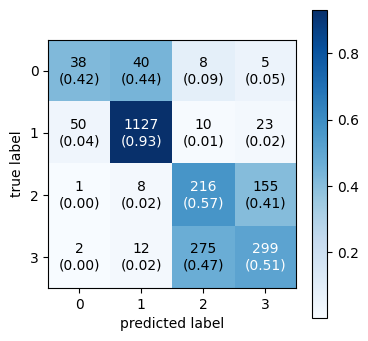

In [63]:
display_confusion_matrix(lbl_real_BERT, lbl_pred_BERT)